# GROUP 22: PROJECT 1
### By Amogh R, Anoop P S, Nikhil Subramanya K, Surya N

The idea behind this project is to predict the **Chance of Admit** during filing an application for Masters Degree. Some of the important parameters that are considered during this process are:
1. GRE Score
2. TOEFL Score
3. CGPA
4. University rating
5. Research Experience
6. Statement of purpose

So to predict the **Chance of Admit**, we will be building the following **Machine Learning Models**:
1. Multiple Linear Regressor
2. Multiple Linear Regressor with Principal Component Analysis
3. Random Forest Regressor
4. Random Forest Regressor with Principal Component Analysis

Then, we will plot:
1. The actual and predicted values.
2. The most significant features against prediction.

**After this process, we will come to an inference about which model is the best for our purpose!**

For this, we will calculate _Mean Squared Error(MSE), Root Mean Squared Error(RMSE) and Coefficient of Determination(R Squared)_. We will consider the model with **minimum MSE, minimum RMSE and maximum R-Squared values.**

**MSE** is calculated by taking the average of the square of the difference between the original and predicted values of the data.

**RMSE** is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

**R Squared** metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

We calculate another metric, called **Classification Accuracy**. It is the number of correct predictions made as a ratio of all predictions made.

# Index
#### DATA PREPROCESSING 
#### PCA IMPLEMENTATION WITH USER-DEFINED FUNCTION
#### MULTIPLE LINEAR REGRESSION
#### MLR1: All-In Method
#### MLR2: Removing the Outliers
#### MLR3: Using Backward Elimination Method
#### MLR-PCA1: Using All-In and Principal Component Analysis methods
#### MLR-PCA2: Eliminating Outliers and applying Principal Component Analysis method
#### RANDOM FOREST REGRESSION
#### RFR1
#### RFR2: Eliminating the Outliers
#### RFR-PCA1 : Principal Component Analysis method
#### RFR-PCA2 : Eliminating Outliers and applying Principal Component Analysis method
#### INFERENCE

## DATA PREPROCESSING

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. 
**Data Preprocessing** is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

Need of Data Preprocessing:
1. Some specified Machine Learning model needs information in a specified format, for example, _Random Forest_ algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
2. Another aspect is that data set should be formatted in such a way that more than one Machine Learning and _Deep Learning_ algorithms are executed in one data set, and best out of them is chosen.

In [1]:
# IMPORTING ALL THE MODULES REQUIRED FOR THE PROJECT
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm
import warnings
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# READING THE DATASET AS DATAFRAMES
df = pd.read_csv("AdmissionData.csv")
# PRINTNG SOME OF THE ROWS OF THE DATASET
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# COMPUTING THE SUMMARY OF STATISTICS PERTAINING TO THE DATAFRAME COLUMNS
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
# DATAPREPROCESSING
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

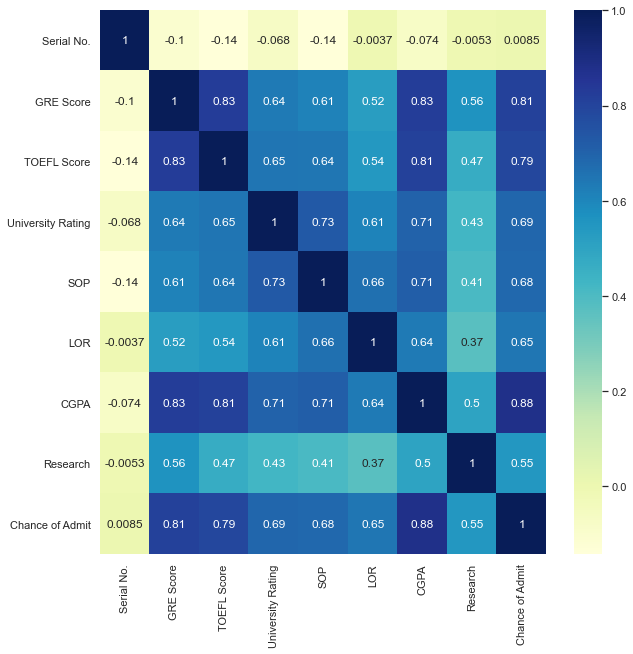

In [5]:
# A TWO-DIMENSIONAL HEATMAP, WHERE INDIVIDUAL VALUES IN EACH MATRIX ARE REPRESENTED
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

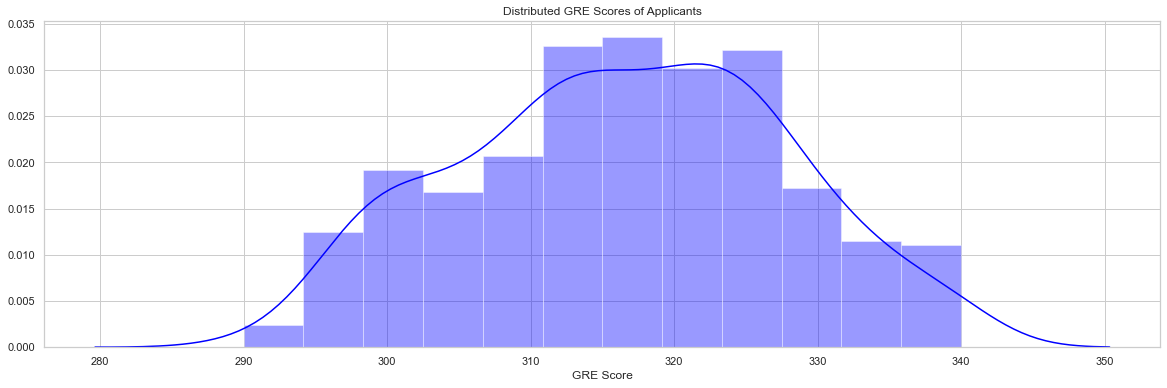

In [6]:
# DISTRIBUTION OF THE GRE MARKS AND THE NUMBER OF STUDENTS WHO HAVE SCORED THOSE MANY MARKS WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['GRE Score'], color="blue")
plt.title('Distributed GRE Scores of Applicants');

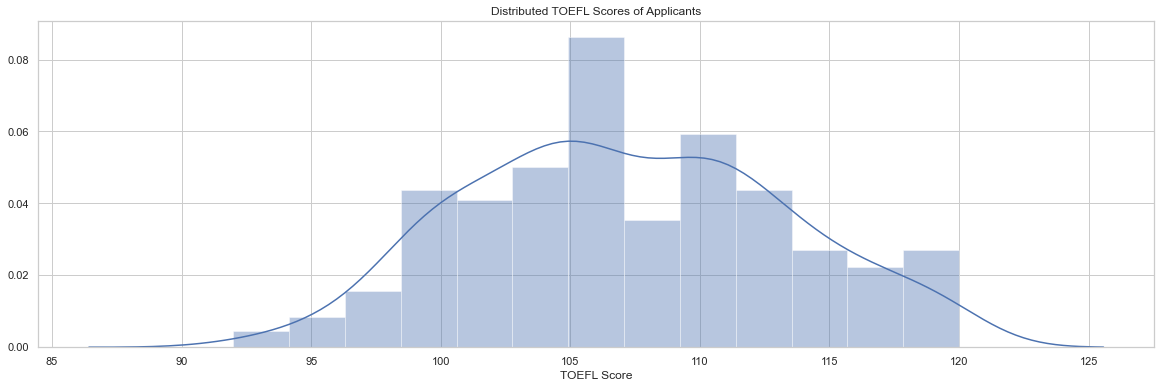

In [7]:
# DISTRIBUTION OF THE TOEFL MARKS AND THE NUMBER OF STUDENTS WHO HAVE SCORED THOSE MANY MARKS WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants');

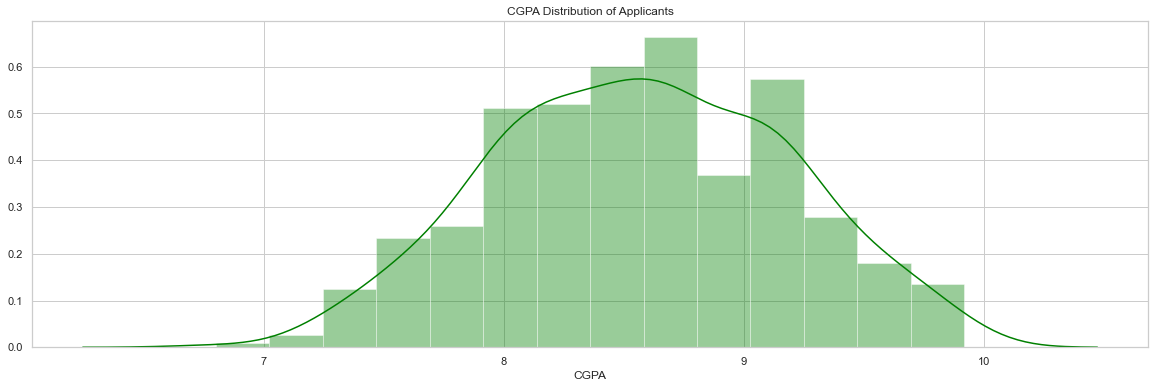

In [8]:
# DISTRIBUTION OF THE CGPA AND THE NUMBER OF STUDENTS WHO HAVE SCORED THAT CGPA WITH HISTOGRAM
plt.figure(figsize=(20,6))
sns.distplot(df['CGPA'], color="green")
plt.title('CGPA Distribution of Applicants');

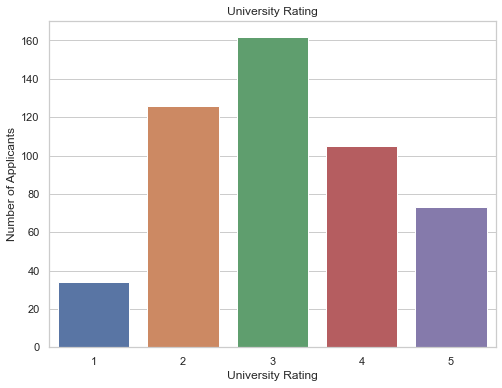

In [9]:
# VISUALISING THE UNIVERSITY RATING OF DIFFERENT STUDENTS 
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants');

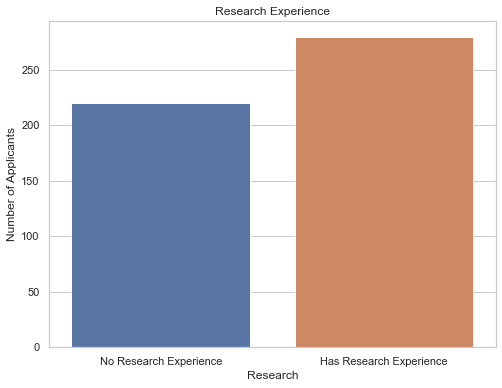

In [10]:
# VISUALISING HOW MANY STUDENTS HAVE RESEARCH EXPERIENCE 
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience']);

In [11]:
# DISCARDING THE SERIAL NO. COLUMN AS WE DO NOT CONSIDER IT AS A FEATURE
df.drop(['Serial No.'],axis=1,inplace=True)

## PCA IMPLEMENTATION WITH USER-DEFINED FUNCTION

Reducing the number of input variables for a predictive model is referred to as dimensionality reduction.Fewer input variables can result in a simpler predictive model that may have better performance when making predictions on new data.

Perhaps the most popular technique for dimensionality reduction in machine learning is **Principal Component Analysis**, or **PCA** for short. This is a technique that comes from the field of _linear algebra_ and can be used as a data preparation technique to create a projection of a dataset prior to fitting a model.

In [12]:
def implementPCA(x_train, x_test):
    pca = PCA(n_components=2)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    return explained_variance, x_train, x_test

## MULTIPLE LINEAR REGRESSION

_Linear Regression_ is commonly used type for predictive analysis. It is a statistical approach to modelling the relationship between a dependent variable and a given set of independent variables. These are of two types:
1. Simple linear Regression
2. Multiple Linear Regression

**Multiple Linear Regression(MLR)** attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. We can use it to find out which factor has the highest impact on the predicted output and now different variable relate to each other.

In this project, we have 5 different MLR models, they are:
1. Multiple Linear Regression using All-In method- _MLR1_
2. Multiple Linear Regression after Eliminating the Outliers- _MLR2_
3. Multiple Linear Regression using Backward Elimination method- _MLR3_
4. Multiple Linear Regression using All-In and Principal Component Analysis methods- _MLR-PCA1_
5. Multiple Linear Regression after Eliminating the Outliers using Principal Component Analysis method- _MLR-PCA2_

**Outliers** in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results. Outliers can skew the summary distribution of attribute values in descriptive statistics like mean and standard deviation and in plots such as histograms and scatterplots, compressing the body of the data.

**Backward elimination** is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output.

## MLR1: All-In Method

In [13]:
# DATA PREPROCESSING
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[X_train.columns])
X_test = scaler.fit_transform(X_test[X_test.columns])

In [14]:
# FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
regr = LinearRegression()
regr.fit(X_train,y_train)
pred = regr.predict(X_test)

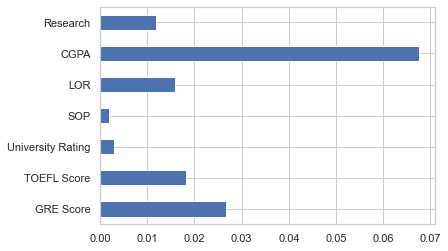

In [15]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION 
f_imp = pd.Series(regr.coef_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

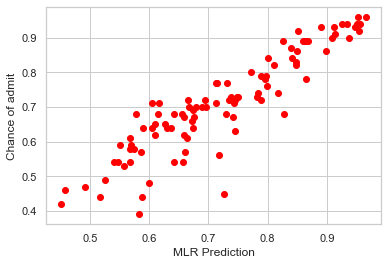

In [16]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('MLR Prediction')
plt.ylabel('Chance of admit')
# plt.plot(pred,y_test,color='blue');
plt.scatter(pred,y_test,color='red');

In [17]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
mlr1_mse = mean_squared_error(y_test, pred)
mlr1_rmse = np.sqrt(mean_squared_error(y_test, pred))
mlr1_rs = r2_score(y_test, pred)
print("Squared Mean Error= ", mlr1_mse)
print("Root Squared Mean Error= ", mlr1_rmse)
print("Coefficient of Determination= ", mlr1_rs)

Squared Mean Error=  0.0037617451048847245
Root Squared Mean Error=  0.061333066977648565
Coefficient of Determination=  0.8160515841132164


In [18]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", regr.score(X_test,y_test)*100,"%!")

Accuracy Acheived=  81.60515841132164 %!


## MLR2: Removing the Outliers
Considering the rows which have equal to or above 75% Chance of Admit.

In [19]:
# DATA PREPROCESSING
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [23]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
warnings.warn("")

In [24]:
# REMOVING THE OUTLIERS
cy_train=[1 if chance > 0.75 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.75 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [25]:
# FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
lr = LinearRegression()
lr.fit(x_train, cy_train)
pred = lr.predict(x_test)

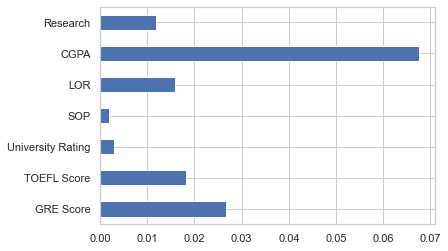

In [26]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION 
f_imp = pd.Series(regr.coef_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

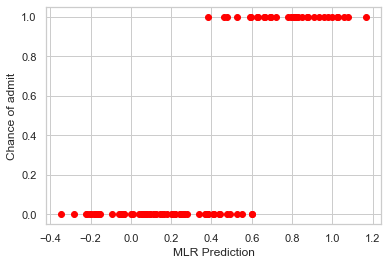

In [27]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('MLR Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(pred,cy_test,color='red');

In [28]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
mlr2_mse = mean_squared_error(cy_test, pred.round())
mlr2_rmse = np.sqrt(mean_squared_error(cy_test, pred.round()))
mlr2_rs = r2_score(cy_test, pred.round())
print("Squared Mean Error= ", mlr2_mse)
print("Root Squared Mean Error= ", mlr2_rmse)
print("Coefficient of Determination= ", mlr2_rs)

Squared Mean Error=  0.07
Root Squared Mean Error=  0.2645751311064591
Coefficient of Determination=  0.6834011759384893


In [29]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", accuracy_score(pred.round(), cy_test, normalize=False),"%!")

Accuracy Acheived=  93 %!


## MLR3: Using Backward Elimination Method

In [30]:
# SORTING THE DATA
x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y=df['Chance of Admit']
x.head()
y.head()

x=pd.get_dummies(x)

In [31]:
# GENERATING A ORDINARY LEAST SQUARES(OLS) SUMMARY TO ELIMINATE FEATURES THAT DONT HAVE MUCH EFFECT ON THE MODEL
x = np.append(arr = np.ones((500, 1)).astype(int), values = x, axis = 1)

x_opt = x[:, [0, 1, 2, 3, 4, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     366.8
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          3.22e-178
Time:                        16:06:41   Log-Likelihood:                 694.60
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     493   BIC:                            -1346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4268      0.097    -14.695      0.000      -1.618      -1.236
x1             0.0024      0.000      4.897      0.000       0.001       0.003
x2             0.0026      0.001      2.974      0.003       0.001       0.004
x3             0.0067      0.004      1.747      0.081      -0.001       0.014
x4             0.0019      0.005      0.417      0.677      -0.007       0.011
x5             0.0177      0.004      4.231      0.000       0.009       0.026
x6             0.1192      0.010     12.137      0.000       0.100       0.139
==============================================================================
Omnibus:                      119.023   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.923
Skew:                          -1.187   Prob(JB):                     7.46e-66
Kurtosis:                       5.959   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# remove the 4th column as it has the highest value 
x_opt = x[:, [0, 1, 2, 3, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     440.9
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          1.59e-179
Time:                        16:06:42   Log-Likelihood:                 694.51
No. Observations:                 500   AIC:                            -1377.
Df Residuals:                     494   BIC:                            -1352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4323      0.096    -14.906      0.000      -1.621      -1.244
x1             0.0024      0.000      4.891      0.000       0.001       0.003
x2             0.0027      0.001      3.030      0.003       0.001       0.004
x3             0.0073      0.004      2.048      0.041       0.000       0.014
x4             0.0182      0.004      4.569      0.000       0.010       0.026
x5             0.1200      0.010     12.433      0.000       0.101       0.139
==============================================================================
Omnibus:                      117.988   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.257
Skew:                          -1.179   Prob(JB):                     4.66e-65
Kurtosis:                       5.944   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# remove the 3rd column as it has the highest value 
x_opt = x[:, [0, 1, 2, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     546.5
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          5.14e-180
Time:                        16:06:43   Log-Likelihood:                 692.40
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     495   BIC:                            -1354.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5017      0.090    -16.648      0.000      -1.679      -1.324
x1             0.0024      0.000      5.011      0.000       0.001       0.003
x2             0.0029      0.001      3.315      0.001       0.001       0.005
x3             0.0206      0.004      5.372      0.000       0.013       0.028
x4             0.1246      0.009     13.227      0.000       0.106       0.143
==============================================================================
Omnibus:                      114.669   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.010
Skew:                          -1.153   Prob(JB):                     3.51e-62
Kurtosis:                       5.876   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# remove the 2nd column as it has the highest value 
x_opt = x[:, [0, 1, 5, 6]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     710.7
Date:                Sun, 05 Jul 2020   Prob (F-statistic):          4.05e-179
Time:                        16:06:44   Log-Likelihood:                 686.91
No. Observations:                 500   AIC:                            -1366.
Df Residuals:                     496   BIC:                            -1349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5323      0.091    -16.907      0.000      -1.710      -1.354
x1             0.0032      0.000      7.441      0.000       0.002       0.004
x2             0.0214      0.004      5.544      0.000       0.014       0.029
x3             0.1354      0.009     15.183      0.000       0.118       0.153
==============================================================================
Omnibus:                      107.246   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.890
Skew:                          -1.089   Prob(JB):                     6.06e-57
Kurtosis:                       5.773   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
lr = LinearRegression() 
lr.fit(x_opt, y) 
pred = lr.predict(x_opt)

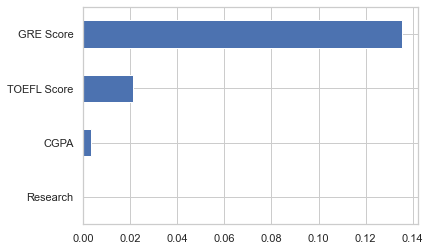

In [36]:
#for i, v in enumerate(lr.coef_):
    #print('Feature: %0d, Score:%.5f'%(i,v))
    
f_imp = pd.Series(lr.coef_, index = ['Research', 'CGPA', 'TOEFL Score', 'GRE Score'])
f_imp.plot(kind = 'barh')
plt.show()

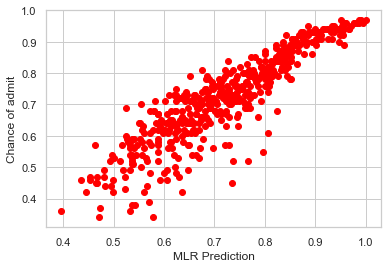

In [37]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('MLR Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(pred, y, color='red');

In [38]:
# CALCULATING MSE, RMSE AND R SQUARED VALUES
mlr3_mse = mean_squared_error(y, pred)
mlr3_rmse = np.sqrt(mean_squared_error(y, pred))
mlr3_rs = r2_score(y, pred)

print("Squared Mean Error= ", mlr3_mse)
print("Root Squared Mean Error= ", mlr3_rmse)
print("Coefficient of Determination= ", mlr3_rs)

Squared Mean Error=  0.0037518759520986005
Root Squared Mean Error=  0.061252558739195544
Coefficient of Determination=  0.81128117778268


In [39]:
# CALCULATING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", lr.score(x_opt, y)*100,"%!")

Accuracy Acheived=  81.128117778268 %!


## MLR-PCA1: Using All-In and Principal Component Analysis methods

In [40]:
# SORTING THE DATA
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [41]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# PERFORMING PRINCIPAL COMPONENT ANALYSIS
explained_variance, x_train, x_test = implementPCA(x_train, x_test)
print('Explained Variance=',explained_variance)

Explained Variance= [0.67000742 0.11117297]


In [42]:
# FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)

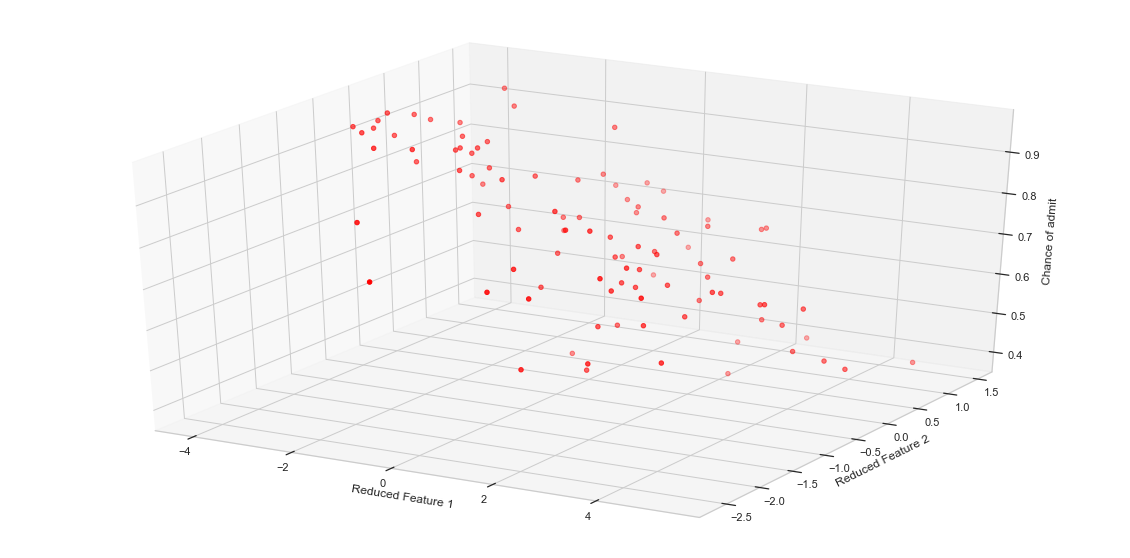

In [43]:
# PLOTTING A THREE-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Reduced Feature 1')
ax.set_ylabel('Reduced Feature 2')
ax.set_zlabel('Chance of admit')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue');
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c = 'red');

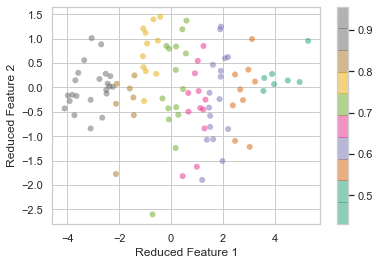

In [49]:
# PLOTTING A TWO-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=pred, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
plt.colorbar();

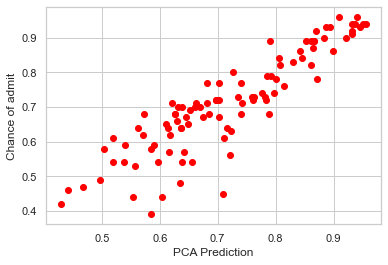

In [50]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(pred,y_test,color='red');

In [51]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
mlr_pca1_mse = mean_squared_error(y_test, pred)
mlr_pca1_rmse = np.sqrt(mean_squared_error(y_test, pred))
mlr_pca1_rs = r2_score(y_test, pred)

print("Squared Mean Error= ", mlr_pca1_mse)
print("Root Squared Mean Error= ", mlr_pca1_rmse)
print("Coefficient of Determination= ", mlr_pca1_rs)

Squared Mean Error=  0.004173972451334667
Root Squared Mean Error=  0.06460628801699311
Coefficient of Determination=  0.7958937676608965


In [52]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", reg.score(x_test,y_test)*100,"%!")

Accuracy Acheived=  79.58937676608964 %!


## MLR-PCA2: Eliminating Outliers and applying Principal Component Analysis method

In [53]:
# SORTING THE DATA
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [54]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
warnings.warn("")

In [55]:
# REMOVING THE OUTLIERS
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

# PERFORMING PRINCIPAL COMPONENT ANALYSIS
explained_variance, x_train, x_test = implementPCA(x_train, x_test)

In [56]:
# FITTING MULTIPLE LINEAR REGRESSION TO THE TRAINING SET
lr = LinearRegression()
lr.fit(x_train, cy_train)
pred = lr.predict(x_test)

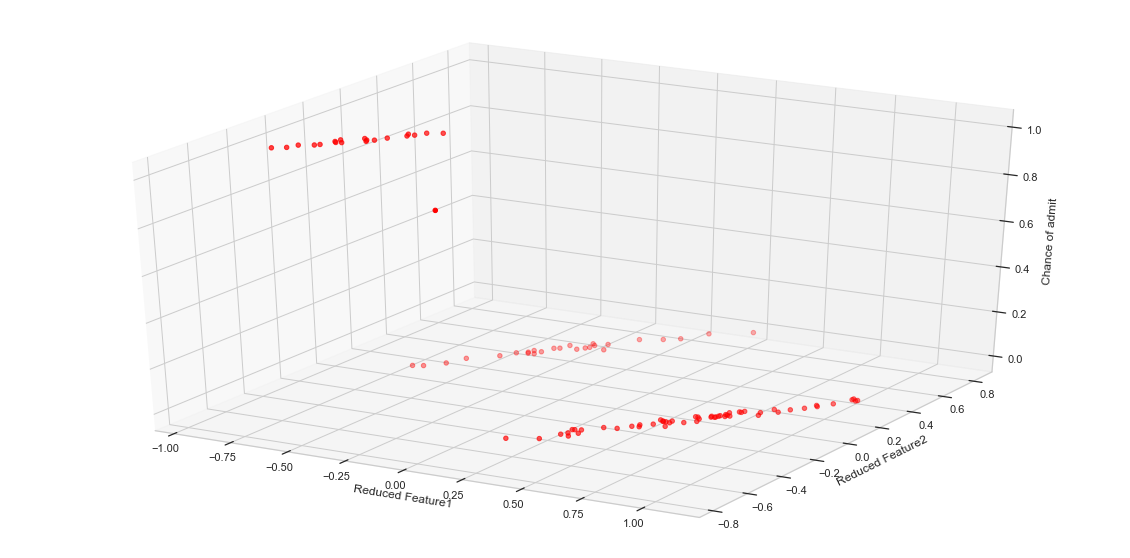

In [57]:
# PLOTTING A THREE-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Reduced Feature1')
ax.set_ylabel('Reduced Feature2')
ax.set_zlabel('Chance of admit')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue');
ax.scatter3D(x_test[:,0],x_test[:,1],cy_test,c = 'red');

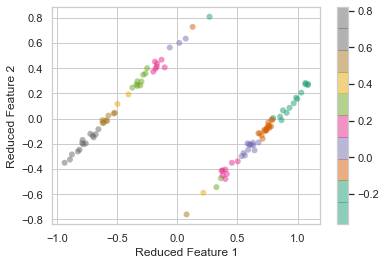

In [58]:
# PLOTTING A TWO-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=pred, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
plt.colorbar();

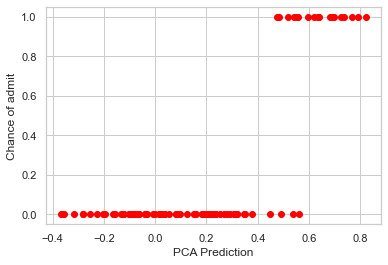

In [59]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(pred,cy_test,color='red');

In [61]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
mlr_pca2_mse = mean_squared_error(cy_test, pred.round())
mlr_pca2_rmse = np.sqrt(mean_squared_error(cy_test, pred.round()))
mlr_pca2_rs = r2_score(cy_test, pred.round())

print("Squared Mean Error= ", mlr_pca2_mse)
print("Root Squared Mean Error= ", mlr_pca2_rmse)
print("Coefficient of Determination= ", mlr_pca2_rs)

Squared Mean Error=  0.04
Root Squared Mean Error=  0.2
Coefficient of Determination=  0.75


In [62]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
accuracy_acheived = accuracy_score(pred.round(), cy_test, normalize=False)
print("Accuracy Acheived= ", accuracy_acheived,"%!")

Accuracy Acheived=  96 %!


## RANDOM FOREST REGRESSION

Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees.

**Random Forest(RFR)** is a _Supervised Learning Algorithm_ which uses ensemble learning method for classification and regression. A random forest is a meta-estimator (i.e. it combines the result of multiple predictions) which aggregates many decision trees, with some helpful modifications:
1. The number of features that can be split on at each node is limited to some percentage of the total (which is known as the hyperparameter). This ensures that the ensemble model does not rely too heavily on any individual feature, and makes fair use of all potentially predictive features.
2. Each tree draws a random sample from the original data set when generating its splits, adding a further element of randomness that prevents overfitting.

The above modifications help prevent the trees from being too highly correlated.

In this project, we have 4 different RFR models, they are:
1. Random Forest Regression- _RFR1_
2. Random Forest Regression after Eliminating the Outliers- _RFR2_
3. Random Forest Regression using Principal Component Analysis method- _RFR-PCA1_
4. Random Forest Regression after Eliminating the Outliers using Principal Component Analysis method- _RFR-PCA2_

**Outliers** in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results. Outliers can skew the summary distribution of attribute values in descriptive statistics like mean and standard deviation and in plots such as histograms and scatterplots, compressing the body of the data.

## RFR1

In [63]:
# DATA PREPROCESSING
targets = df['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [64]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
forest = RandomForestRegressor(n_estimators=210,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)

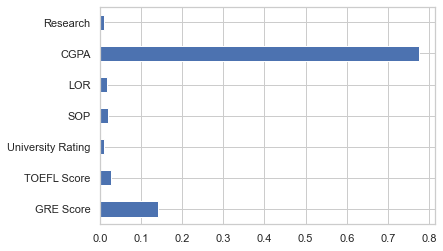

In [65]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION
f_imp = pd.Series(forest.feature_importances_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

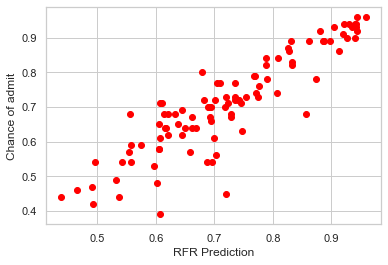

In [66]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('RFR Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(y_predict, y_test,color='red');

In [67]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr1_mse = mean_squared_error(y_test, y_predict)
rfr1_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rfr1_rs = r2_score(y_test, y_predict)

print("Squared Mean Error= ", rfr1_mse)
print("Root Squared Mean Error= ", rfr1_rmse)
print("Coefficient of Determination= ", rfr1_rs)

Squared Mean Error=  0.004176280383489792
Root Squared Mean Error=  0.06462414706199063
Coefficient of Determination=  0.7957809103427975


In [68]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", (forest.score(X_test, y_test))*100,"%!")

Accuracy Acheived=  79.57809103427975 %!


## RFR2: Eliminating the Outliers

In [69]:
# DATA PREPROCESSING
col_names=df.columns.tolist()
var=df.columns.values.tolist()
y=df['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=df[x]

In [70]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])
warnings.warn(" ")

In [71]:
# REMOVING THE OUTLIERS
cy_train=[1 if chance > 0.75 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.75 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [72]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
rf = RandomForestRegressor()
rf.fit(x_train, cy_train)
pred = rf.predict(x_test)

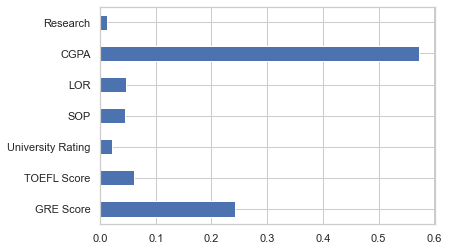

In [73]:
# VISUALISING THE MOST SIGNIFICANT FEATURES AGAINST PREDICTION 
f_imp = pd.Series(rf.feature_importances_, index = features.columns)
f_imp.plot(kind = 'barh')
plt.show()

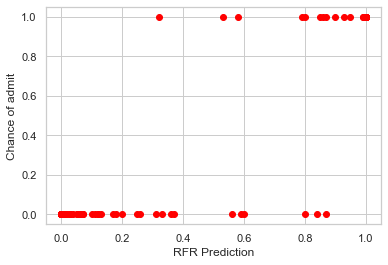

In [74]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('RFR Prediction')
plt.ylabel('Chance of admit')
plt.scatter(rf.predict(x_test), cy_test,color='red');

In [75]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr2_mse = mean_squared_error(cy_test, pred)
rfr2_rmse = np.sqrt(mean_squared_error(cy_test, pred))
rfr2_rs = r2_score(cy_test, pred)

print("Squared Mean Error= ", rfr2_mse)
print("Root Squared Mean Error= ", rfr2_rmse)
print("Coefficient of Determination= ", rfr2_rs)

Squared Mean Error=  0.049434
Root Squared Mean Error=  0.22233758116881636
Coefficient of Determination=  0.7764179104477612


In [76]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", accuracy_score(cy_test, rf.predict(x_test).round())*100,"%!")

Accuracy Acheived=  93.0 %!


## RFR-PCA1 : Principal Component Analysis method

In [77]:
# SORTING THE DATA
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [78]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# PERFORMING PRINCIPAL COMPONENT ANALYSIS
explained_variance, x_train, x_test = implementPCA(x_train, x_test)
print('Explained Variance=',explained_variance)

Explained Variance= [0.67000742 0.11117297]


In [79]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
forest = RandomForestRegressor(n_estimators=210,max_depth=6,random_state=0)
forest.fit(x_train, y_train)
y_predict = forest.predict(x_test)

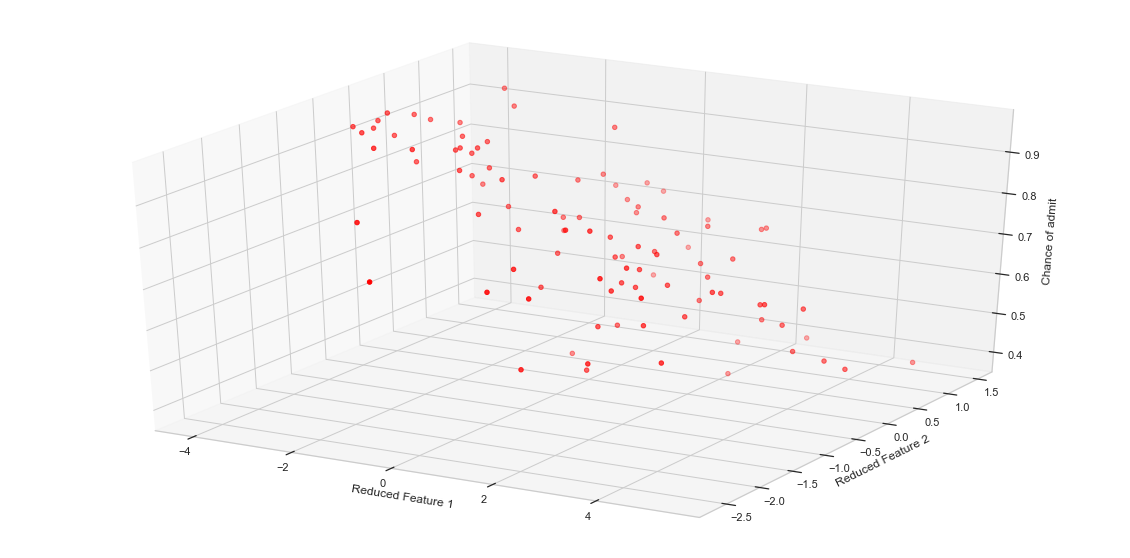

In [80]:
# PLOTTING A THREE-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Reduced Feature 1')
ax.set_ylabel('Reduced Feature 2')
ax.set_zlabel('Chance of admit')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue');
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c = 'red');

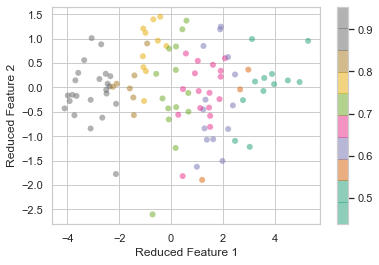

In [81]:
# PLOTTING A TWO-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=y_predict, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Dark2', 10))
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
plt.colorbar();

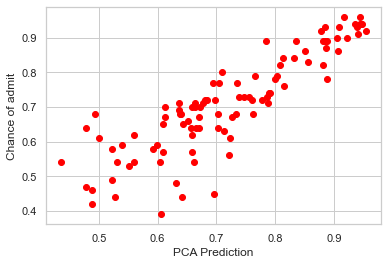

In [82]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')
#plt.plot(y_predict,y_test,color='blue');
plt.scatter(y_predict,y_test,color='red');

In [83]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr_pca1_mse = mean_squared_error(y_test,y_predict)
rfr_pca1_rmse = np.sqrt(mean_squared_error(y_test,y_predict))
rfr_pca1_rs = r2_score(y_test, y_predict)

print("Squared Mean Error= ", rfr_pca1_mse)
print("Root Squared Mean Error= ", rfr_pca1_rmse)
print("Coefficient of Determination= ", rfr_pca1_rs)

Squared Mean Error=  0.004961185008332574
Root Squared Mean Error=  0.07043567993802981
Coefficient of Determination=  0.7573992660962067


In [84]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", forest.score(x_test,y_test)*100,"%!")

Accuracy Acheived=  75.73992660962067 %!


## RFR-PCA2 : Eliminating Outliers and applying Principal Component Analysis method

In [85]:
# SORTING THE DATA
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [86]:
# NORMALISING THE DATA WITHIN THE REQUIRED TEST AND TRAIN RANGES
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
xs = MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

In [87]:
# REMOVING THE OUTLIERS
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

explained_variance, x_train, x_test = implementPCA(x_train, x_test)
print(explained_variance)

[0.63077021 0.21282338]


In [88]:
# FITTING RANDOM FOREST REGRESSION TO THE TRAINING SET
rf = RandomForestRegressor()
rf.fit(x_train, cy_train)
pred = rf.predict(x_test)

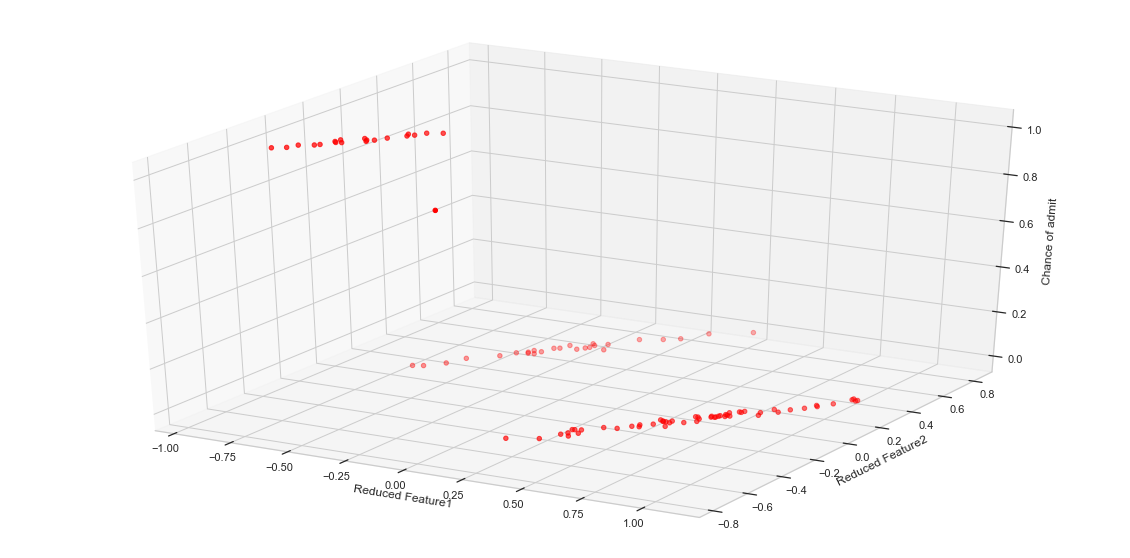

In [89]:
# PLOTTING A THREE-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
ax = plt.figure(figsize=(20,10)).add_subplot(projection = '3d')
ax.set_xlabel('Reduced Feature1')
ax.set_ylabel('Reduced Feature2')
ax.set_zlabel('Chance of admit')
#ax.plot3D(x_test[:,0],x_test[:,1],pred(x_test),c = 'blue');
ax.scatter3D(x_test[:,0],x_test[:,1],cy_test,c = 'red');

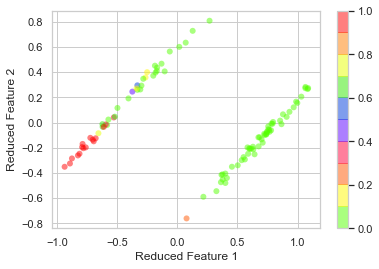

In [90]:
# PLOTTING A TWO-DIMENSIONAL GRAPH TO VISUALISE THE PREDICTION
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=rf.predict(x_test), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism_r', 10))
plt.xlabel('Reduced Feature 1')
plt.ylabel('Reduced Feature 2')
plt.colorbar();

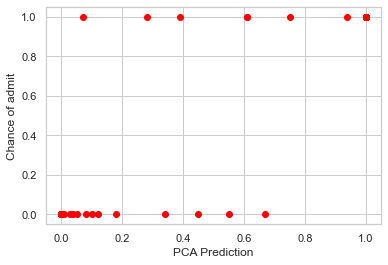

In [91]:
# PLOTTING THE ACTUAL AND PREDICTED VALUES
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')
#plt.plot(pred,y_test,color='blue');
plt.scatter(pred,cy_test,color='red');

In [92]:
# CALCULATING AND PRINTING MSE, RMSE AND R SQUARED VALUES
rfr_pca2_mse = mean_squared_error(cy_test, pred)
rfr_pca2_rmse = np.sqrt(mean_squared_error(cy_test, pred))
rfr_pca2_rs = r2_score(cy_test, pred)

print("Squared Mean Error= ", rfr_pca2_mse)
print("Root Squared Mean Error= ", rfr_pca2_rmse)
print("Coefficient of Determination= ", rfr_pca2_rs)

Squared Mean Error=  0.032635
Root Squared Mean Error=  0.1806515983876146
Coefficient of Determination=  0.7960312500000001


In [93]:
# CALCULATING AND PRINTING THE CLASSIFICATION ACCURACY
print("Accuracy Acheived= ", rf.score(x_test,cy_test)*100,"%!")

Accuracy Acheived=  79.603125 %!


# INFERENCE
### Now we will take a look at MSE, RMSE and R Squared values of all models

#### MLR1: All-In Method

In [94]:
print("MSE = ", mlr1_mse)
print("RMSE = ", mlr1_rmse)
print("RS = ", mlr1_rs)

MSE =  0.0037617451048847245
RMSE =  0.061333066977648565
RS =  0.8160515841132164


#### MLR2: Removing the Outliers

In [95]:
print("MSE = ", mlr2_mse)
print("RMSE = ", mlr2_rmse)
print("RS = ", mlr2_rs)

MSE =  0.07
RMSE =  0.2645751311064591
RS =  0.6834011759384893


#### MLR3: Using Backward Elimination Method

In [96]:
print("MSE = ", mlr3_mse)
print("RMSE = ", mlr3_rmse)
print("RS = ", mlr3_rs)

MSE =  0.0037518759520986005
RMSE =  0.061252558739195544
RS =  0.81128117778268


#### MLR-PCA1: Using All-In and Principal Component Analysis methods

In [97]:
print("MSE = ", mlr_pca1_mse)
print("RMSE = ", mlr_pca1_rmse)
print("RS = ", mlr_pca1_rs)

MSE =  0.004173972451334667
RMSE =  0.06460628801699311
RS =  0.7958937676608965


#### MLR-PCA2: Eliminating Outliers and applying Principal Component Analysis method

In [98]:
print("MSE = ", mlr_pca2_mse)
print("RMSE = ", mlr_pca2_rmse)
print("RS = ", mlr_pca2_rs)

MSE =  0.04
RMSE =  0.2
RS =  0.75


#### RFR1

In [99]:
print("MSE = ", rfr1_mse)
print("RMSE = ", rfr1_rmse)
print("RS = ", rfr1_rs)

MSE =  0.004176280383489792
RMSE =  0.06462414706199063
RS =  0.7957809103427975


#### RFR2: Eliminating the Outliers

In [100]:
print("MSE = ", rfr2_mse)
print("RMSE = ", rfr2_rmse)
print("RS = ", rfr2_rs)

MSE =  0.049434
RMSE =  0.22233758116881636
RS =  0.7764179104477612


#### RFR-PCA1 : Principal Component Analysis method

In [101]:
print("MSE = ", rfr_pca1_mse)
print("RMSE = ", rfr_pca1_rmse)
print("RS = ", rfr_pca1_rs)

MSE =  0.004961185008332574
RMSE =  0.07043567993802981
RS =  0.7573992660962067


#### RFR-PCA2 : Eliminating Outliers and applying Principal Component Analysis method

In [102]:
print("MSE = ", rfr_pca2_mse)
print("RMSE = ", rfr_pca2_rmse)
print("RS = ", rfr_pca2_rs)

MSE =  0.032635
RMSE =  0.1806515983876146
RS =  0.7960312500000001


#### For obtaining the best model for our purpose, we will consider the model with minimum MSE, minimum RMSE and maximum R-Squared values.
We see that **MLR3: Using Backward Elimination Method** has the least MSE and RMSE values among all other, and maximum R Squared values. Hence we conclude that this model is the best for our purpose, considering this dataset!

In [103]:
print("The classification metrics of our best model is:")
print("MSE = ", mlr3_mse)
print("RMSE = ", mlr3_rmse)
print("RS = ", mlr3_rs)

The classification metrics of our best model is:
MSE =  0.0037518759520986005
RMSE =  0.061252558739195544
RS =  0.81128117778268


**Classification Accuracy** , the number of correct predictions made as a ratio of all predictions made is:

In [104]:
print("Accuracy Acheived= ", accuracy_acheived,"%!")

Accuracy Acheived=  96 %!
